# Analise de dados CSV (Comma-separated values)

Arquivos de texto que faz ordenação dos dados numa linha, separando os valores por virgulas.
> Utilizaremos funções simples para obter os dados e fazer as analises (`open`).


In [20]:
with open('./../dados/VILA-VELHA-(A634).csv', 'r') as f:
    next(f)
    cabecalho = next(f)
    for line in f:
        linha = line.split(';')

In [22]:
cabecalho.split(';')

['Data',
 'Hora (UTC)',
 'Temp. Ins. (C)',
 'Temp. Max. (C)',
 'Temp. Min. (C)',
 'Umi. Ins. (%)',
 'Umi. Max. (%)',
 'Umi. Min. (%)',
 'Pto Orvalho Ins. (C)',
 'Pto Orvalho Max. (C)',
 'Pto Orvalho Min. (C)',
 'Pressao Ins. (hPa)',
 'Pressao Max. (hPa)',
 'Pressao Min. (hPa)',
 'Vel. Vento (m/s)',
 'Dir. Vento (m/s)',
 'Raj. Vento (m/s)',
 'Radiacao (KJ/m²)',
 'Chuva (mm)',
 '\n']

In [30]:
def get_var(nome_arquivo, nome_variavel):
    f = open(nome_arquivo)
    next(f)
    cabecalho = next(f)
    cabecalho = cabecalho.split(';')
    print(cabecalho)
    ind = cabecalho.index(nome_variavel)
    variavel = []
    for row in f:
        row = row.split(';')
        variavel.append(row[ind])
    return variavel

variavel = get_var('./../dados/VILA-VELHA-(A634).csv', 'Vel. Vento (m/s)')

['Data', 'Hora (UTC)', 'Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)', 'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)', 'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)', 'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)', 'Vel. Vento (m/s)', 'Dir. Vento (m/s)', 'Raj. Vento (m/s)', 'Radiacao (KJ/m²)', 'Chuva (mm)', '\n']


In [31]:
print(variavel)

['1,5', '0,9', '1,8', '1,2', '1,1', '1,0', '1,2', '0,9', '1,0', '2,1', '0,4', '1,0', '2,1', '1,7', '1,9', '1,9', '1,7', '2,0', '1,6', '1,0', '0,7', '0,4', '0,5', '1,1', '1,2', '2,4', '1,8', '2,5', '1,1', '0,7', '1,6', '1,4', '1,6', '1,8', '1,8', '1,4', '1,6', '1,9', '2,5', '1,8', '3,0', '2,5', '1,5', '1,0', '1,0', '0,4', '1,1', '0,9', '1,9', '1,9', '2,9', '2,4', '1,5', '1,3', '1,7', '1,0', '1,7', '1,7', '4,8', '5,9', '3,9', '4,7', '5,9', '5,6', '6,2', '6,6', '7,2', '5,4', '4,1', '3,7', '3,0', '3,7', '2,1', '2,5', '2,8', '3,0', '2,8', '1,8', '2,9', '2,8', '2,3', '1,7', '3,0', '2,6', '4,2', '5,2', '6,4', '5,0', '6,4', '3,4', '2,7', '2,9', '1,8', '1,8', '2,1', '1,5', '2,8', '1,9', '2,0', '1,3', '1,1', '1,7', '1,8', '2,1', '2,4', '2,9', '3,8', '3,5', '4,5', '6,7', '6,6', '7,0', '6,7', '6,3', '6,9', '4,8', '3,8', '5,3', '4,5', '3,9', '3,4', '4,1', '3,3', '2,7', '2,5', '2,2', '2,5', '2,1', '2,8', '3,8', '5,0', '6,1', '6,1', '6,6', '7,9', '7,5', '7,7', '7,1', '6,1', '5,6', '5,6', '6,2', '4,5'

> Utilizando a função `csv`

In [18]:
import csv

def get_var(nome_arquivo, nome_variavel):
    f = open(nome_arquivo)
    rows = csv.reader(f, delimiter=';')
    next(rows)
    headers = next(rows)
    print(headers)
    ind = headers.index(nome_variavel)
    variavel = []
    for row in rows:
        variavel.append(row[ind])
    return variavel

variavel = get_var('./../dados/VILA-VELHA-(A634).csv', 'Vel. Vento (m/s)')

['Data', 'Hora (UTC)', 'Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)', 'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)', 'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)', 'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)', 'Vel. Vento (m/s)', 'Dir. Vento (m/s)', 'Raj. Vento (m/s)', 'Radiacao (KJ/m²)', 'Chuva (mm)', '']


* A leitura dos dados foi correta?
* Qué aconteceu com os dados?
> podemos ver o que esta acontecendo quando olharmos para o gráfico

In [19]:
print(variavel)

['1,5', '0,9', '1,8', '1,2', '1,1', '1,0', '1,2', '0,9', '1,0', '2,1', '0,4', '1,0', '2,1', '1,7', '1,9', '1,9', '1,7', '2,0', '1,6', '1,0', '0,7', '0,4', '0,5', '1,1', '1,2', '2,4', '1,8', '2,5', '1,1', '0,7', '1,6', '1,4', '1,6', '1,8', '1,8', '1,4', '1,6', '1,9', '2,5', '1,8', '3,0', '2,5', '1,5', '1,0', '1,0', '0,4', '1,1', '0,9', '1,9', '1,9', '2,9', '2,4', '1,5', '1,3', '1,7', '1,0', '1,7', '1,7', '4,8', '5,9', '3,9', '4,7', '5,9', '5,6', '6,2', '6,6', '7,2', '5,4', '4,1', '3,7', '3,0', '3,7', '2,1', '2,5', '2,8', '3,0', '2,8', '1,8', '2,9', '2,8', '2,3', '1,7', '3,0', '2,6', '4,2', '5,2', '6,4', '5,0', '6,4', '3,4', '2,7', '2,9', '1,8', '1,8', '2,1', '1,5', '2,8', '1,9', '2,0', '1,3', '1,1', '1,7', '1,8', '2,1', '2,4', '2,9', '3,8', '3,5', '4,5', '6,7', '6,6', '7,0', '6,7', '6,3', '6,9', '4,8', '3,8', '5,3', '4,5', '3,9', '3,4', '4,1', '3,3', '2,7', '2,5', '2,2', '2,5', '2,1', '2,8', '3,8', '5,0', '6,1', '6,1', '6,6', '7,9', '7,5', '7,7', '7,1', '6,1', '5,6', '5,6', '6,2', '4,5'

In [23]:
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [24]:
!pip install matplotlib

435.80s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 8.0 MB/s eta 0:00:0000:0100:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 957.2/957.2 kB 8.7 MB/s eta 0:00:0000:0100:01
  Using cached Pillow-9.2.0-cp39-cp39-manylinux_2_28_x86_64.whl (3.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 7.7 MB/s eta 0:00:00:00:010:01m

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


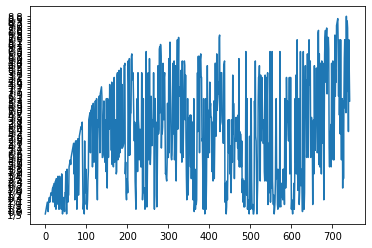

In [25]:
from matplotlib import pyplot as plt

plt.plot(variavel)

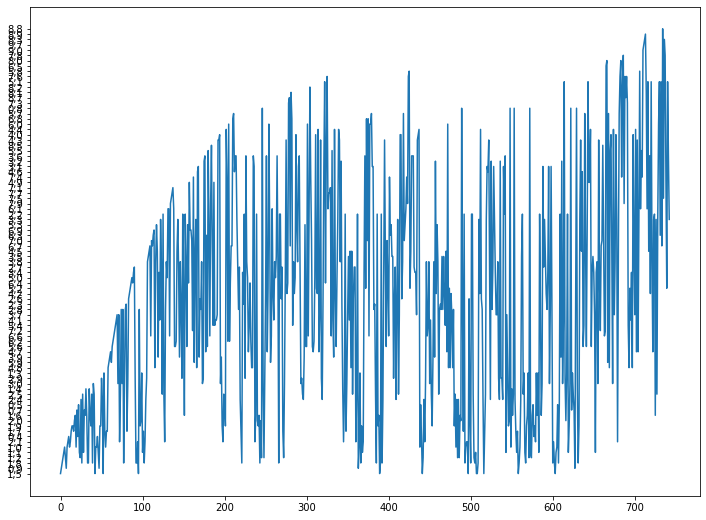

In [26]:
fig = plt.figure(figsize=(12, 9))
plt.plot(variavel)

## Agora devemos corrigir o que esta errado

In [ ]:
# O nosso problema é o tipo string e float

import csv

def get_var(nome_arquivo, nome_variavel):
    f = open(nome_arquivo)
    rows = csv.reader(f, delimiter=';')
    next(rows)
    headers = next(rows)
    print(headers)
    ind = headers.index(nome_variavel)
    variavel = []
    for row in rows:
        variavel.append(row[ind])
    return variavel

variavel = get_var('./../dados/VILA-VELHA-(A634).csv', 'Vel. Vento (m/s)')